# 따릉이 대여량 예측하기

## 1.1 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 train 데이터 살펴보기

## 1.2.1 변수 설명
- Date : 날짜 yyyy-mm-dd
- Rented Bike Count : 대여 건수(예측하려는 값)
- Hour: 시간대(0시~23시)
- Temperature : 기온
- Humidity : 습도 => 0이면 결측치일 가능성이 큼
- Wind speed : 풍속 => 0이면 결측치일 가능성이 큼
- Visibility: 시정거리(사람이 육안으로 볼 수 있는 거리)
- Dew point tepmerature: 이슬점 온도
- Solar Radiation: 일사량 => 0이면 결측치일 가능성이 큼
- Rainfall : 강수량
- Snowfall: 적설량 (눈이 쌓인 높이, 0이면 눈이 안왔다는 뜻)
- Seasons : 계절 => 인코딩 필요
- Holiday: 공휴일 여부 => 인코딩 필요
- Functioning Day : 운영일 여부 =>운영을 안한 경우 제거

## 1.2.2 가설 세우기
- 출퇴근 시간대에 대여량이 많을 것이다.
- 겨울에 대여량이 가장 적을 것이다.
- 강수량이 대여량에 가장 큰 영향을 미칠 것이다.

In [3]:
train = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\train.csv")
test = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\test.csv")

In [4]:
train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
train.shape

(8040, 14)

In [6]:
train.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8035  31/10/2018               1507    19              8.4           53   
8036  31/10/2018               1176    20              7.6           59   
8037  31/10/2018               1069    21              7.6           59   
8038  31/10/2018               1088    22              6.8           58   
8039  31/10/2018                798    23              6.4           60   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)

In [7]:
train.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [8]:
train.columns # 변수 보기

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# 변수 중 수치형인 것만 골라 담기
num_cols = train.select_dtypes(include = ['int64', 'float64']).columns
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

## 1.2.3 Target 변수 분포 확인

In [10]:

import matplotlib as mpl

# 한글 폰트 설정 
plt.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지


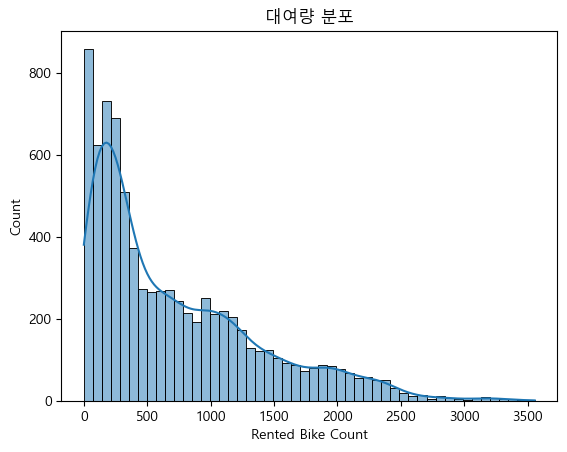

In [11]:

sns.histplot(train['Rented Bike Count'], bins= 50 , kde = True)
plt.title('대여량 분포')
plt.show()

#왼쪽으로 많이 치우쳐져 있다. 모델 성능에 개선이 필요하면 로그변환 해야할수도..

## 1.2.4 시간별 대여량 확인

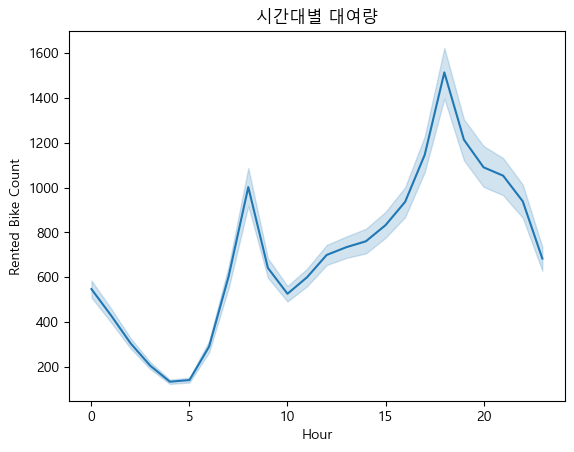

In [12]:


sns.lineplot(x= 'Hour', y= 'Rented Bike Count', data= train)
plt.title('시간대별 대여량')
plt.show()

#오전 8시, 오후 6시 근처 대여량이 높다 => 출퇴근 시간에 영향을 받는다.


## 1.2.5 수치형 변수와 대여량의 관계 확인

Text(0.5, 1.0, 'correlation heatmap')

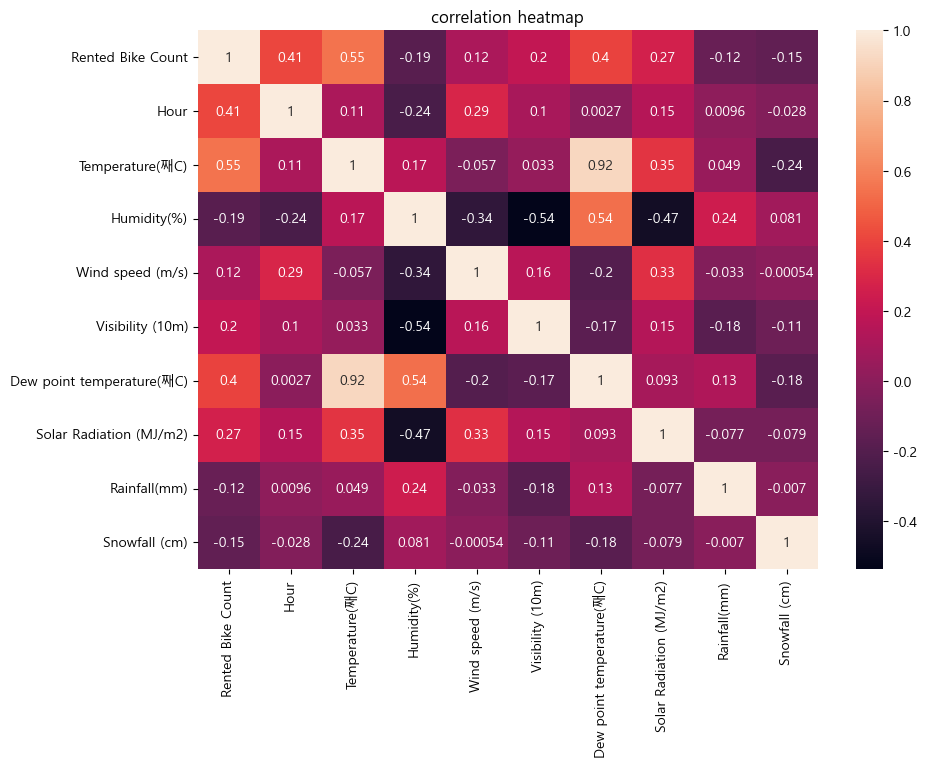

In [13]:


plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(train[num_cols].corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#기온과 대여량의 상관계수 : 0.55 => 기온 증가하면 대여량도 증가한다.
# 시간과 대여량의 상관계수: 0.41 => 어느정도 관련은 있으나 단순 선형 관계는 약하다. 하루 패턴은 비선형이기 때문.

## 1.2.6 계절별 평균 대여량 확인

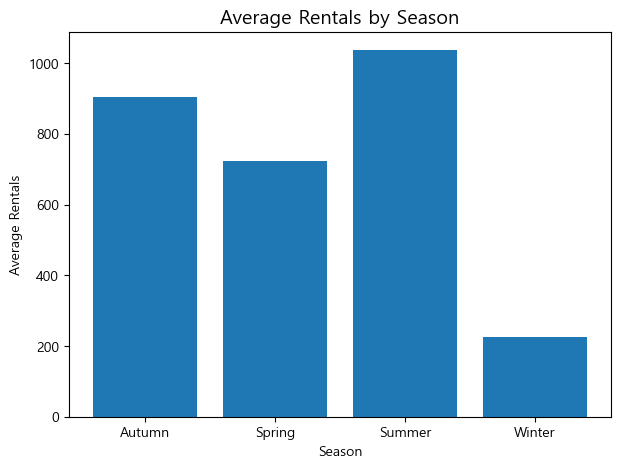

In [ ]:

season_pred = train.groupby('Seasons')['Rented Bike Count'].mean()

plt.figure(figsize=(7,5))
plt.bar(season_pred.index, season_pred.values)
plt.title('Average Rentals by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

#계절별 확실한 차이를 보이고 있다.
# 여름 대여량이 겨울 대여량의 4배 이상이다.

## 1.2.6 이상치 탐색

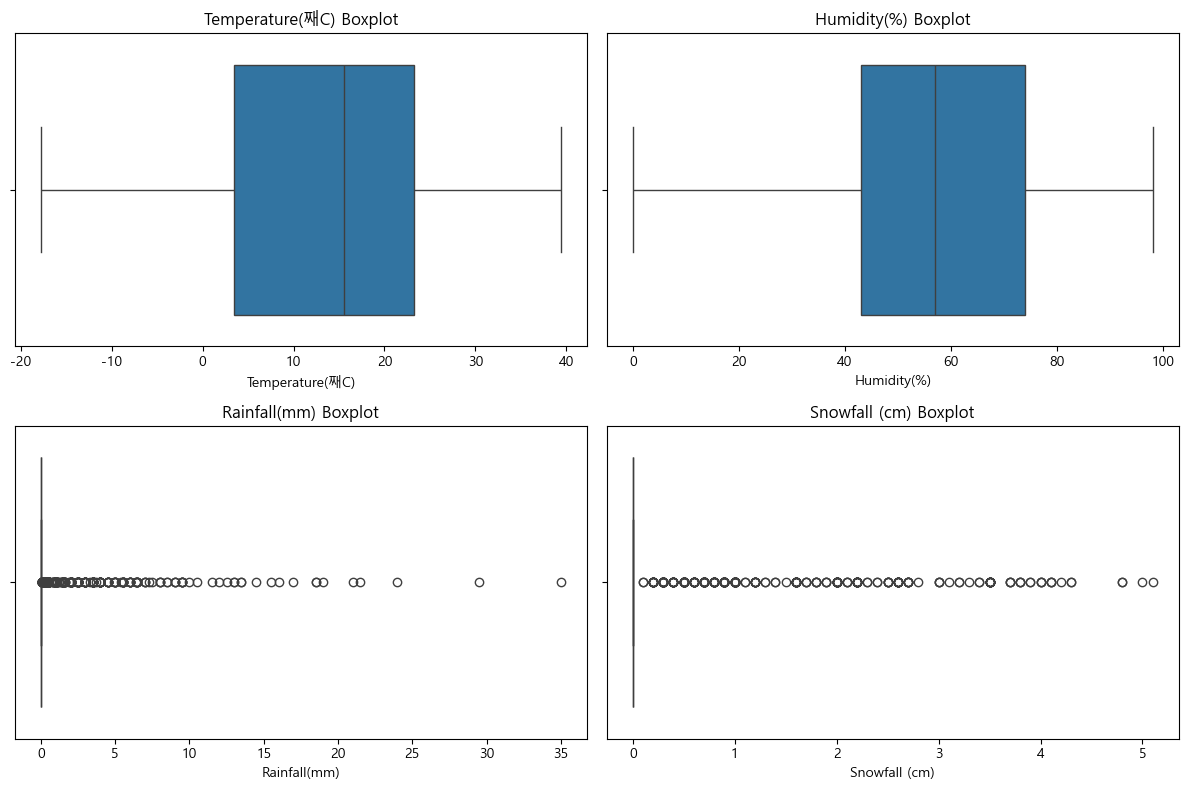

In [15]:
cols = ['Temperature(째C)','Humidity(%)','Rainfall(mm)','Snowfall (cm)']
        
#2행 2열로 배치
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x= train[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')


plt.tight_layout()
plt.show()


#문제 되는 이상치는 없는 것으로 판단

## 1.3 파생 변수 추가하기

- 강수 여부, 적설 여부 : 강수량(적설량)>0 이면 1, 아니면 0

In [16]:
train['rain_flag'] = (train['Rainfall(mm)']>0).astype(int)
train['snow_flag'] = (train['Snowfall (cm)']>0).astype(int)


## 1.3.1 강수 여부에 따른 대여량 차이

In [18]:
target_col = 'Rented Bike Count'  # 대여량 컬럼 이름

# 1️⃣ 강수 여부별 평균 대여량
rain_pattern = train.groupby('rain_flag')[target_col].mean()
print("Rainfall 여부별 평균 대여량:")
print(rain_pattern)

Rainfall 여부별 평균 대여량:
rain_flag
0    746.725196
1    165.371820
Name: Rented Bike Count, dtype: float64


C:\Users\yms10\AppData\Local\Temp\ipykernel_27640\3791003269.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rain_flag', y=target_col, data=train, estimator='mean', ci=None)


Text(0.5, 1.0, 'Average Rentals by Rainfall')

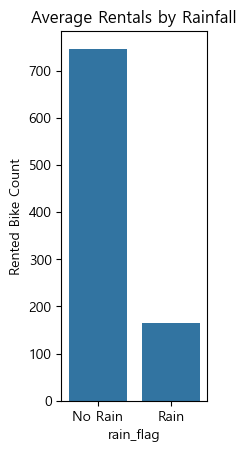

In [19]:
plt.subplot(1,3,1)
sns.barplot(x='rain_flag', y=target_col, data=train, estimator='mean', ci=None)
plt.xticks([0,1], ['No Rain','Rain'])
plt.title('Average Rentals by Rainfall')

#강수 여부에 따른 대여량 차이가 확실히 있음

## 1.3.2 적설 여부에 따른 대여량 차이

In [ ]:
snow_pattern = train.groupby('snow_flag')[target_col].mean()
print("\nSnowfall 여부별 평균 대여량:")
print(snow_pattern)


Snowfall 여부별 평균 대여량:
snow_flag
0    738.093096
1    157.303571
Name: Rented Bike Count, dtype: float64


C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\2554082573.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='snow_flag', y=target_col, data=train, estimator='mean', ci=None)


Text(0.5, 1.0, 'Average Rentals by Snowfall')

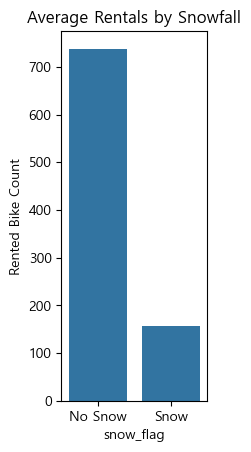

In [ ]:
plt.subplot(1,3,2)
sns.barplot(x='snow_flag', y=target_col, data=train, estimator='mean', ci=None)
plt.xticks([0,1], ['No Snow','Snow'])
plt.title('Average Rentals by Snowfall')

## 1.4 변수 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = train['Rented Bike Count']
X = train.drop(columns = ['Rented Bike Count', 'Date'])

In [ ]:
X_train , X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2 , random_state= 42)

In [ ]:
#Date 컬럼 처리
train['Date'] = pd.to_datetime(train['Date'], dayfirst = True)
test['Date'] = pd.to_datetime(test['Date'], dayfirst = True)

# 2. 결측치 처리하기

## 2.1 결측치 찾기

In [ ]:
#NAN 찾기
train.isnull().sum() 
#결측치가 Teperature, Wind speed, Seasons 에 존재함


Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
rain_flag                      0
snow_flag                      0
dtype: int64

In [ ]:
train.columns[train.columns.duplicated()]

Index([], dtype='object')

In [ ]:
# 0이 있는 열 보기
(train == 0).sum().loc[lambda x : x >0]

# 이 중 0이 불가능한 변수들 : Humidity , Solar Radiation(낮), Wind speed (낮)

Rented Bike Count             223
Hour                          335
Temperature(째C)                17
Humidity(%)                    17
Wind speed (m/s)               53
Dew point temperature(째C)      45
Solar Radiation (MJ/m2)      3890
Rainfall(mm)                 7529
Snowfall (cm)                7648
rain_flag                    7529
snow_flag                    7648
dtype: int64

###  1) 낮시간(7~18시) 중 Solar Radiation이 0 => NaN 처리

In [ ]:
day = train['Hour'].between(7,18) #낮시간 정의
train.loc[day & (train['Solar Radiation (MJ/m2)'] == 0), "Solar Radiation (MJ/m2) "] = np.nan #낮시간 중 일사량이 0인 것은 결측치로 처리

In [ ]:
day = test['Hour'].between(7,18) #낮시간 정의
test.loc[day & (test['Solar Radiation (MJ/m2)'] == 0), "Solar Radiation (MJ/m2) "] = np.nan #낮시간 중 일사량이 0인 것은 결측치로 처리

### 2) Humidity 가 0 => NaN 처리

In [ ]:

train.loc[train['Humidity(%)'] == 0, 'Humidity(%)'] = np.nan

In [ ]:
test.loc[train['Humidity(%)'] == 0, 'Humidity(%)'] = np.nan

### 3) 낮 시간 중 Wind speed가 0 => NaN 처리

In [ ]:

train.loc[day & (train['Wind speed (m/s)'] == 0), 'Wind speed (m/s)'] = np.nan

In [ ]:
test.loc[day & (test['Wind speed (m/s)'] == 0), 'Wind speed (m/s)'] = np.nan

In [ ]:
# 결측치 다시 확인
train.isnull().sum()
# => Humidity, Wind speed, Solar Radiation 모두 결측치가 증가함

Date                            0
Rented Bike Count               0
Hour                            0
Temperature(째C)               800
Humidity(%)                    17
Wind speed (m/s)              813
Visibility (10m)                0
Dew point temperature(째C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                       802
Holiday                         0
Functioning Day                 0
rain_flag                       0
snow_flag                       0
Solar Radiation (MJ/m2)      8040
dtype: int64

In [ ]:
test.isnull().sum()

Date                           0
Hour                           0
Temperature(째C)               76
Humidity(%)                    0
Wind speed (m/s)              76
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                       74
Holiday                        0
Functioning Day                0
Solar Radiation (MJ/m2)      720
dtype: int64

### 4) 중복 변수 제거

In [ ]:
# 1. 컬럼명 repr로 확인 
for col in train.columns:
    print(repr(col))

# 2. 공백 제거 + 특수공백 제거
train.columns = train.columns.str.strip()
train.columns = train.columns.str.replace('\u00A0', '', regex=True)

# 3. 중복된 Solar Radiation 제거
train = train.loc[:, ~train.columns.duplicated()]

# 4. 결측치 있는 컬럼 확인
print(train.isna().sum())


'Date'
'Rented Bike Count'
'Hour'
'Temperature(째C)'
'Humidity(%)'
'Wind speed (m/s)'
'Visibility (10m)'
'Dew point temperature(째C)'
'Solar Radiation (MJ/m2)'
'Rainfall(mm)'
'Snowfall (cm)'
'Seasons'
'Holiday'
'Functioning Day'
'rain_flag'
'snow_flag'
'Solar Radiation (MJ/m2) '
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                   17
Wind speed (m/s)             813
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
rain_flag                      0
snow_flag                      0
dtype: int64


In [ ]:
# 1. 컬럼명 repr로 확인 
for col in test.columns:
    print(repr(col))

# 2. 공백 제거 + 특수공백 제거
test.columns = test.columns.str.strip()
test.columns = test.columns.str.replace('\u00A0', '', regex=True)

# 3. 중복된 Solar Radiation 제거
test = test.loc[:, ~test.columns.duplicated()]

# 4. 결측치 있는 컬럼 확인
print(test.isna().sum())

'Date'
'Hour'
'Temperature(째C)'
'Humidity(%)'
'Wind speed (m/s)'
'Visibility (10m)'
'Dew point temperature(째C)'
'Solar Radiation (MJ/m2)'
'Rainfall(mm)'
'Snowfall (cm)'
'Seasons'
'Holiday'
'Functioning Day'
'Solar Radiation (MJ/m2) '
Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             76
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64


## 2.2 결측치 처리하기  


- 보간법(Interpolation) : 연속적인 값들 사이의 결측치를 자연스럽게 메꾸는 기법  
 => 풍속, 일사량, 습도, 온도 등과 같이 시간적으로 연속적인 특성을 가지는 변수들은 전후 시점의 값과 유사한 흐름을 가지며, 단기간 급격한 변화할 가능성이 낮기 때문에 보간법을 사용함.

 - 계절: 날짜에 맞게 채운다.

### 2.2.1 각 변수에 보간 적용하기

### 1) Solar Radiation (MJ/m2)에 보간 적용

In [ ]:

train['Solar Radiation (MJ/m2)'] = train["Solar Radiation (MJ/m2)"].interpolate( method = 'linear', limt_direction = 'both')

C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\1347585500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Solar Radiation (MJ/m2)'] = train["Solar Radiation (MJ/m2)"].interpolate( method = 'linear', limt_direction = 'both')


In [ ]:
test['Solar Radiation (MJ/m2)'] = test["Solar Radiation (MJ/m2)"].interpolate( method = 'linear', limt_direction = 'both')

### 2) Wind speed (m/s)에 보간 적용

In [ ]:

train['Wind speed (m/s)'] = train["Wind speed (m/s)"].interpolate( method = 'linear', limt_direction = 'both')

C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\740682633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Wind speed (m/s)'] = train["Wind speed (m/s)"].interpolate( method = 'linear', limt_direction = 'both')


In [ ]:
test['Wind speed (m/s)'] = test["Wind speed (m/s)"].interpolate( method = 'linear', limt_direction = 'both')

### 3) Humidity에 보간 적용

In [ ]:

train['Humidity(%)'] = train["Humidity(%)"].interpolate( method = 'linear', limt_direction = 'both')

C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\1808122370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Humidity(%)'] = train["Humidity(%)"].interpolate( method = 'linear', limt_direction = 'both')


In [ ]:
test['Humidity(%)'] = test["Humidity(%)"].interpolate( method = 'linear', limt_direction = 'both')

### 4)Temperature(째C) 에 보간 적용

In [ ]:

train['Temperature(째C)'] = train["Temperature(째C)"].interpolate( method = 'linear', limt_direction = 'both')

C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\1761228050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Temperature(째C)'] = train["Temperature(째C)"].interpolate( method = 'linear', limt_direction = 'both')


In [ ]:
test['Temperature(째C)'] = test["Temperature(째C)"].interpolate( method = 'linear', limt_direction = 'both')

### 2.2.2 계절 결측치 채우기
- 12,1,2월: 겨울  
  3,4,5월: 봄  
  6,7,8월: 여름  
9,10,11월: 가을

In [ ]:

# 1. Date를 datetime으로 변환
train['Date'] = pd.to_datetime(train['Date'], dayfirst = True)

# 2. 월(month) 컬럼 추가
train['month'] = train['Date'].dt.month

# 3. 계절 매핑
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'

train['Seasons'] = train['month'].apply(get_season)

C:\Users\yms10\AppData\Local\Temp\ipykernel_23248\2589971745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'], dayfirst = True)


In [ ]:
# 1. Date를 datetime으로 변환
test['Date'] = pd.to_datetime(test['Date'], dayfirst = True)

# 2. 월(month) 컬럼 추가
test['month'] = test['Date'].dt.month

# 3. 계절 매핑
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'

test['Seasons'] = test['month'].apply(get_season)

In [ ]:
train.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
rain_flag                    0
snow_flag                    0
month                        0
dtype: int64

In [ ]:
test.isnull().sum()

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
dtype: int64

## 2.3 불필요한 컬럼 제거

- 'Date' 는 증가하는 숫자에 불과하므로 지운다.

In [ ]:
drop_cols = ['Date']
x = train.drop(columns = ['Rented Bike Count'] + drop_cols)
y = train['Rented Bike Count']
x_test = test.drop(columns = drop_cols)


# 3. 범주형 변수 인코딩 & 스케일링

- Seasons, Holiday, Functioning Day 와 같은 범주형 변수는 인코딩이 필요함

In [ ]:
x = pd.get_dummies(x) #범주형 변수만 원핫인코딩
x_test = pd.get_dummies(x_test)

In [ ]:
# train / validation split

x_train, x_val, y_train, y_val = train_test_split( x, y, test_size= 0.2 , random_state= 42)

In [ ]:
#test 칼럼을 train 과 동일하게 맞춘다.
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# 4. 스케일링
- 수치형 변수들은 스케일링 한다.

In [ ]:
# 수치형 스케일링
from sklearn.preprocessing import StandardScaler


num_cols = ['Hour', 'Temperature(째C)','Humidity(%)',
        'Wind speed (m/s)','Visibility (10m)',
        'Dew point temperature(째C)',
        'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

#StandardScaler 선언
scaler = StandardScaler()

#학습 데이터로 fit
scaler.fit(x_train)

#transform
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)



# 5. 모델 적용

## 5.1 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#1. 모델 정의
ridge = Ridge(alpha = 1.0 , random_state= 42)

#2. 학습
ridge.fit(x_train_scaled, y_train)

#3. 데이터 예측
y_pred_ridge = ridge.predict(x_val_scaled)

#4. 성능 평가
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
print('Ridge RMSE', rmse_ridge)

Ridge RMSE 425.26301760970995


##### Ridge Regression RMSE : 425.26301760970995

## 5.2 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

#1. 모델 정의
lasso = Lasso(alpha= 0.01 , random_state= 42)

#2. 학습
lasso.fit(x_train, y_train)

#3. 데이터 예측
y_pred_lasso = lasso.predict(x_val_scaled)

#4. 성능 평가(RMSE)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
print('Lasso RMSE:', rmse_lasso)

Lasso RMSE: 1018.5936939579643


c:\Users\yms10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.885e+08, tolerance: 2.768e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\yms10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


#### Lasso Regression RMSE: 1018.5936939579643

## 5.3 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1. 모델 정의
rf = RandomForestRegressor(
    n_estimators= 200,
    max_depth = None,
    random_state = 42,
    n_jobs= -1
)

#2. 학습
rf.fit(x_train, y_train)

#3. 검증 데이터 예측
y_pred_rf = rf.predict(x_val)

#4. RMSE
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 218.83535198899227


#### Random Forest RMSE : 218.83535198899227

## 5.4 XGB Regressor 

In [ ]:
from xgboost import XGBRegressor

#1. 모델 정의
xgb = XGBRegressor(
    n_estimators = 300,
    max_depth = 8,
    learning_rate = 0.05,
    subsamplee = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    n_jobs = -1
)

#2. 학습
xgb.fit(x_train, y_train)

#3. 데이터 예측
y_pred_xgb = xgb.predict(x_val)

#4. 성능 평가(RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print("XGB RMSE:", rmse_xgb)


c:\Users\yms10\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "subsamplee" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB RMSE: 212.00267171075933


#### XGB RMSE: 212.00267171075933

## 5.5 Ridge, Lasso, RandomForest, XGB 성능 비교

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Ridge": ridge,
    "Lasso": lasso,
    "RandomForest": rf,
    "XGB": xgb
}

for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.3f}")

c:\Users\yms10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\yms10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Ridge → RMSE: 27288.32, R²: -1696.419
Lasso → RMSE: 425.26, R²: 0.588
RandomForest → RMSE: 218.84, R²: 0.891
XGB → RMSE: 212.00, R²: 0.898


### => 최종 모델로 XGB를 채택함

# 6. 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [ ]:
# 모델
xgb_model = xgb.XGBRegressor(random_state = 42)

In [ ]:
# 하이퍼파라미터 후보

param_dist = {
    'n_estimators':[200,300,500,800],
    'max_depth': [3,5,7,9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.7,0.7,0.9,1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0]
}

In [ ]:
#RandomizeSearch

random_search = RandomizedSearchCV(
    estimator= xgb_model,
    param_distributions= param_dist,
    n_iter = 20,
    scoring = 'neg_root_mean_squared_error',
    cv=3,
    random_state = 42,
    n_jobs= -1
)

In [ ]:
# 학습

random_search.fit(x_train, y_train)

print('최적 파라미터:', random_search.best_params_)
print("CV 최적 RMSE:", -random_search.best_score_)

최적 파라미터: {'subsample': 0.7, 'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
CV 최적 RMSE: 219.21200561523438


### 튜닝 안하는 게 더 성능이 좋음.. 확장해서 튜닝 다시 시도

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# 모델
xgb_model = xgb.XGBRegressor(random_state=42)

# 하이퍼파라미터 범위 확장
param_dist = {
    'n_estimators': [300, 500, 700, 900, 1000],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearch 확장
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # 탐색 횟수 늘림
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# 학습
random_search.fit(x_train, y_train)

print("최적 파라미터:", random_search.best_params_)
print("CV 최적 RMSE:", -random_search.best_score_)


최적 파라미터: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
CV 최적 RMSE: 219.32097371419272


### 기존 모델의 성능이 가장 우수했다. XGB(212 RMSE) 채택

# 7. 예측 및 평가

In [ ]:
# 1. 최종 모델 재학습

final_model = XGBRegressor(
    random_state = 42,
    n_estimators = 300,
    max_depth = 8,
    learning_rate = 0.05,
    subsample = 0.8
)

final_model.fit(x,y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
#2. test 예측
test_pred = final_model.predict(x_test_scaled)

#예측 결과를 새로운 칼럼에 저장
test['Rented Bike Count'] = test_pred

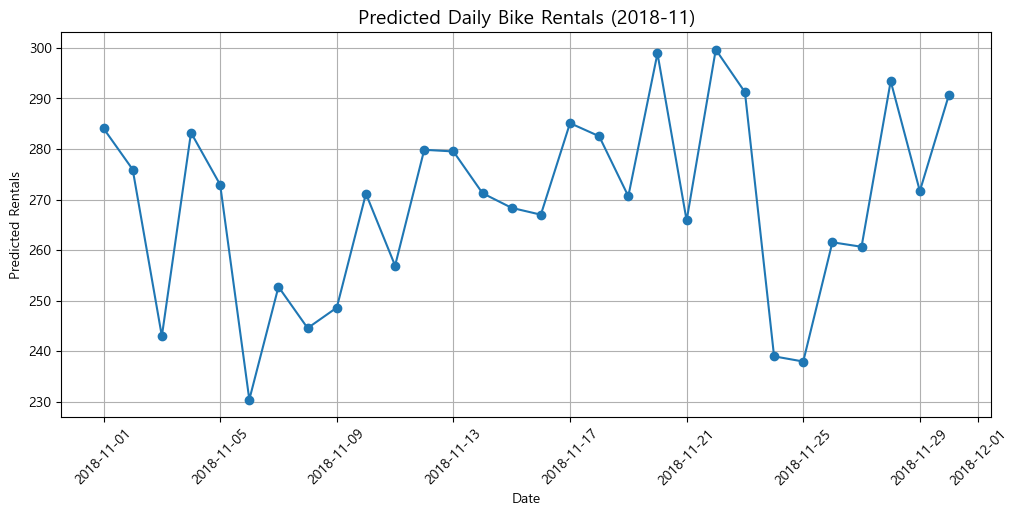

In [ ]:
#3. 날짜별 평균 대여량 시각화

test_plot =test[['Date', 'Rented Bike Count']].copy()
test_plot = test_plot.sort_values("Date")

daily_pred = test_plot.groupby("Date")['Rented Bike Count'].mean()

plt.figure(figsize=(12,5))
plt.plot(daily_pred.index, daily_pred.values, marker = 'o')
plt.title("Predicted Daily Bike Rentals (2018-11)", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Predicted Rentals")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

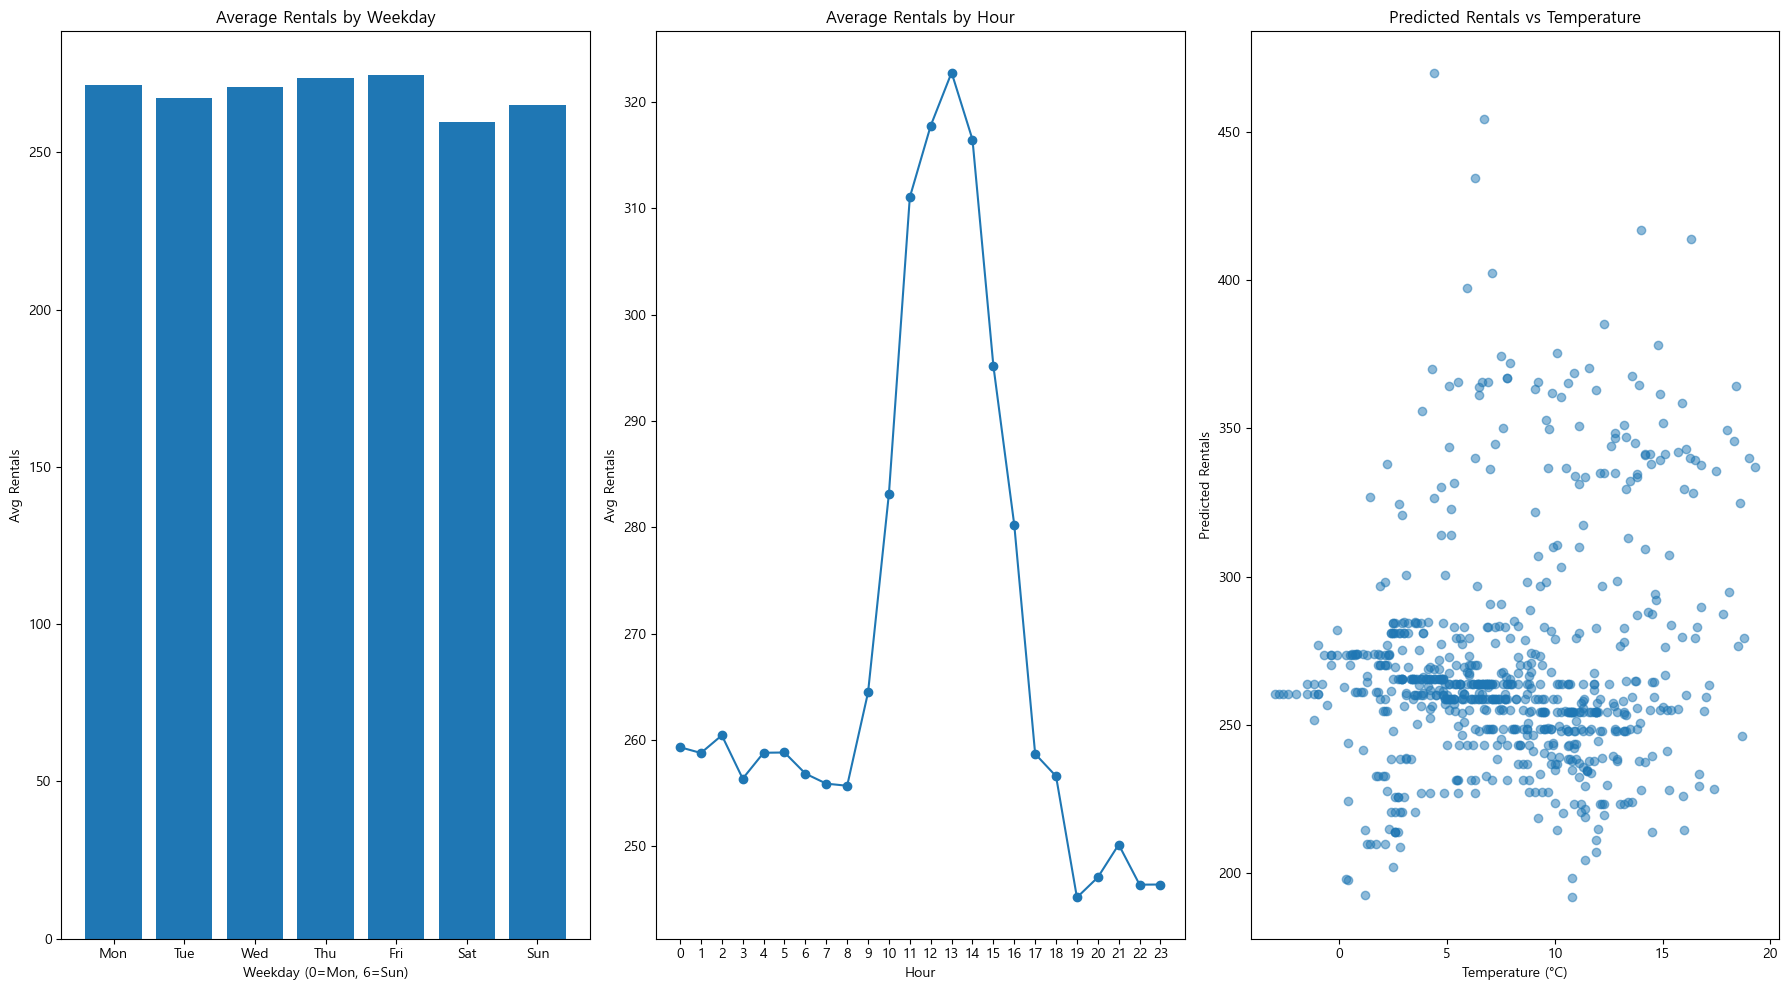

In [ ]:
# 1. 요일 컬럼 추가 (0=Mon, 6=Sun)
test['weekday'] = test['Date'].dt.weekday

fig, axes = plt.subplots(1, 3, figsize=(18,10))

#2. 요일별 평균 예측 대여량
weekday_pred = test.groupby('weekday')['Rented Bike Count'].mean()
axes[0].bar(weekday_pred.index, weekday_pred.values)
axes[0].set_title('Average Rentals by Weekday')
axes[0].set_xlabel('Weekday (0=Mon, 6=Sun)')
axes[0].set_ylabel('Avg Rentals')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

#3. 시간대별 평균 예측 대여량
hourly_pred = test.groupby('Hour')['Rented Bike Count'].mean()
axes[1].plot(hourly_pred.index, hourly_pred.values, marker='o')
axes[1].set_title('Average Rentals by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Avg Rentals')
axes[1].set_xticks(range(0,24))

#4. 기온 vs 예측 대여량 산점도
axes[2].scatter(test['Temperature(째C)'], test['Rented Bike Count'], alpha=0.5)
axes[2].set_title('Predicted Rentals vs Temperature')
axes[2].set_xlabel('Temperature (°C)')
axes[2].set_ylabel('Predicted Rentals')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

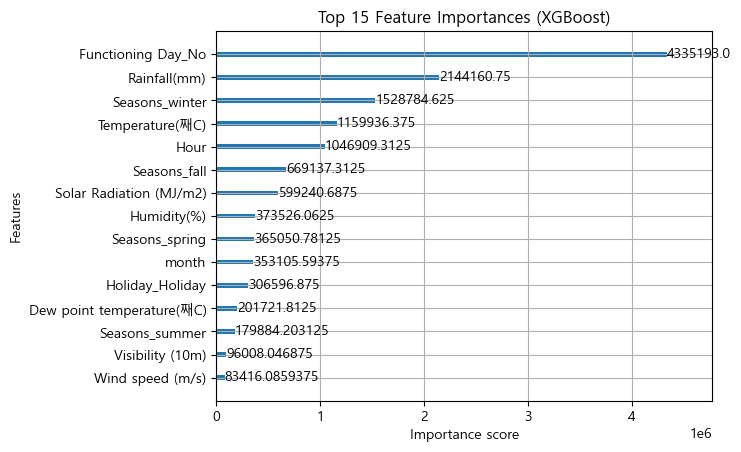

In [ ]:
#  변수 중요도 시각화
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(final_model, max_num_features=15, importance_type='gain')  
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()

#강수량이 가장 큰 영향을 미친당~~~